In [1]:
import numpy as np
import pandas as pd
import sklearn



from sklearn.model_selection import train_test_split
from matplotlib import pyplot

import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler

%load_ext autotime

import warnings
warnings.filterwarnings('ignore')

time: 198 µs (started: 2022-05-09 18:26:36 +04:00)


In [2]:
# Train/Test data (missing values replaced by 0s)

filepath = "../Data/TrainData0.csv"

train_data_0 = pd.read_csv(filepath)

filepath = "../Data/TestData0.csv"

test_data_0 = pd.read_csv(filepath)

time: 2.69 s (started: 2022-05-09 18:26:36 +04:00)


In [3]:
# Train/Test data (missing values replaced by mean/median)

filepath = "../Data/TrainDataMean.csv"

train_data_mean = pd.read_csv(filepath)

filepath = "../Data/TestDataMean.csv"

test_data_mean = pd.read_csv(filepath)

time: 2.83 s (started: 2022-05-09 18:26:39 +04:00)


In [4]:
# Train/Test data (missing values replaced by MissForest)

filepath = "../Data/TrainDataMf.csv"

train_data_mf = pd.read_csv(filepath)

filepath = "../Data/TestDataMf.csv"

test_data_mf = pd.read_csv(filepath)

time: 2.65 s (started: 2022-05-09 18:26:42 +04:00)


In [5]:
# In this dictionary the scores of each model will be saved, then it will be converted to dataframe

aucs = {'models':['Lightgbm', 'Xgboost', 'Logistic Regression'], 'Fill_0':[], 'Fill_mean':[], 'Fill_mf':[]}

time: 207 µs (started: 2022-05-09 18:26:45 +04:00)


# Fill with 0 (Missing values replaced by 0)


In [6]:
# Dropping "Lead Flag" and "ZIPCode" to run models on the train and test datasets.

x_train_0 = train_data_0.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_train_0 = train_data_0['Lead Flag']

x_test_0 = test_data_0.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_test_0 = test_data_0['Lead Flag']

time: 158 ms (started: 2022-05-09 18:26:45 +04:00)


In [7]:
# LightGBM on the data.

model_0_lgbm = lgb.LGBMClassifier(learning_rate=0.2, max_depth=2, random_state=42)
model_0_lgbm.fit(x_train_0, y_train_0)

LGBMClassifier(learning_rate=0.2, max_depth=2, random_state=42)

time: 2.21 s (started: 2022-05-09 18:26:45 +04:00)


In [8]:
# Getting test and train scores for LightGBM, adding test score to the comparison dictionary.

Y0_lgbm_0=model_0_lgbm.predict_proba(x_train_0)[:,1]
Y1_lgbm_0=model_0_lgbm.predict_proba(x_test_0)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_0, Y0_lgbm_0))
print ("ROC_AUC Test:", roc_auc_score(y_test_0, Y1_lgbm_0))

aucs['Fill_0'].append(roc_auc_score(y_test_0, Y1_lgbm_0))

ROC_AUC Train: 0.7296151237501732
ROC_AUC Test: 0.7153624987059289
time: 1.04 s (started: 2022-05-09 18:26:47 +04:00)


In [9]:
# XGBoost on the data.

model_0_xgb = XGBClassifier(learning_rate=0.5, max_depth=1, random_state=42)
model_0_xgb.fit(x_train_0, y_train_0) 

[18:26:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

time: 8.21 s (started: 2022-05-09 18:26:48 +04:00)


In [10]:
# Getting test and train scores for XGBoost, adding test score to the comparison dictionary.

Y0_xgb_0=model_0_xgb.predict_proba(x_train_0)[:,1]
Y1_xgb_0=model_0_xgb.predict_proba(x_test_0)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_0, Y0_xgb_0))
print ("ROC_AUC Test:", roc_auc_score(y_test_0, Y1_xgb_0))

aucs['Fill_0'].append(roc_auc_score(y_test_0, Y1_xgb_0))

ROC_AUC Train: 0.7162663477227014
ROC_AUC Test: 0.7140309154950273
time: 717 ms (started: 2022-05-09 18:26:56 +04:00)


In [11]:
# Running Logisting Regression, printing summary for visual evaluation of the non significant features

logreg = LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_0,y_train_0)

est = sm.Logit(y_train_0, x_train_0.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051498
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638884
Method:                           MLE   Df Model:                           49
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04847
Time:                        18:27:37   Log-Likelihood:                -32904.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades          

In [12]:
# Getting only the significant features, for filtering out non significants from the dataset.

significant_features_0 = {'feature':[], 'pval':[]}

for attributeIndex in range (0, x_train_0.shape[1]):
    if(est.pvalues[attributeIndex] <= 0.05):
        significant_features_0['pval'].append(est.pvalues[attributeIndex])
        significant_features_0['feature'].append(x_train_0.columns[attributeIndex])
        
significant_features_0 = pd.DataFrame.from_dict(significant_features_0)

time: 7.69 ms (started: 2022-05-09 18:27:37 +04:00)


In [13]:
# Leaving only significant features both in train and test datasets.

x_train_0_sign = x_train_0[significant_features_0['feature']]
x_test_0_sign = x_test_0[significant_features_0['feature']]

time: 46.4 ms (started: 2022-05-09 18:27:37 +04:00)


In [14]:
# Running Logistic Regression again to get the scores for train and test.

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_0_sign,y_train_0)

est = sm.Logit(y_train_0, x_train_0_sign.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051548
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638905
Method:                           MLE   Df Model:                           28
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04753
Time:                        18:28:00   Log-Likelihood:                -32936.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades                    

In [15]:
# Getting test and train scores for Logistic Regression, adding test score to the comparison dictionary.

Y0_logreg_0=logreg.predict_proba(x_train_0_sign)[:,1]
Y1_logreg_0=logreg.predict_proba(x_test_0_sign)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_0, Y0_logreg_0))
print ("ROC_AUC Test:", roc_auc_score(y_test_0, Y1_logreg_0))

aucs['Fill_0'].append(roc_auc_score(y_test_0, Y1_logreg_0))

ROC_AUC Train: 0.7028018586837483
ROC_AUC Test: 0.7038751559644375
time: 349 ms (started: 2022-05-09 18:28:00 +04:00)


# Fill with mean (Missing values replaced by mean/median)

In [16]:
# Dropping "Lead Flag" and "ZIPCode" to run models on the train and test datasets.

x_train_mean = train_data_mean.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_train_mean = train_data_mean['Lead Flag']

x_test_mean = test_data_mean.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_test_mean = test_data_mean['Lead Flag']

time: 164 ms (started: 2022-05-09 18:28:01 +04:00)


In [17]:
# LightGBM on the data.

model_mean = lgb.LGBMClassifier(learning_rate=0.6,max_depth=1,random_state=42)
model_mean.fit(x_train_mean,y_train_mean,verbose=20)

LGBMClassifier(learning_rate=0.6, max_depth=1, random_state=42)

time: 2.43 s (started: 2022-05-09 18:28:01 +04:00)


In [18]:
# Getting test and train scores for LightGBM, adding test score to the comparison dictionary.

Y0_lgbm_mean=model_mean.predict_proba(x_train_mean)[:,1]
Y1_lgbm_mean=model_mean.predict_proba(x_test_mean)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mean, Y0_lgbm_mean))
print ("ROC_AUC Test:", roc_auc_score(y_test_mean, Y1_lgbm_mean))

aucs['Fill_mean'].append(roc_auc_score(y_test_mean, Y1_lgbm_mean))

ROC_AUC Train: 0.7175363651153825
ROC_AUC Test: 0.7137379508540128
time: 923 ms (started: 2022-05-09 18:28:03 +04:00)


In [19]:
# XGBoost on the data.

model_mean_xgb = XGBClassifier(learning_rate=0.7,max_depth=1,random_state=42)
model_mean_xgb.fit(x_train_mean,y_train_mean,verbose=20) #0.7 8

[18:28:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

time: 8.43 s (started: 2022-05-09 18:28:04 +04:00)


In [20]:
# Getting test and train scores for XGBoost, adding test score to the comparison dictionary.

Y0_xgb_mean=model_mean_xgb.predict_proba(x_train_mean)[:,1]
Y1_xgb_mean=model_mean_xgb.predict_proba(x_test_mean)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mean, Y0_xgb_mean))
print ("ROC_AUC Test:", roc_auc_score(y_test_mean, Y1_xgb_mean))

aucs['Fill_mean'].append(roc_auc_score(y_test_mean, Y1_xgb_mean))

ROC_AUC Train: 0.7187451260075501
ROC_AUC Test: 0.7139709683057569
time: 662 ms (started: 2022-05-09 18:28:13 +04:00)


In [21]:
# Running Logisting Regression, printing summary for visual evaluation of the non significant features

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_mean,y_train_mean)

est = sm.Logit(y_train_mean, x_train_mean.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051499
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638884
Method:                           MLE   Df Model:                           49
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04844
Time:                        18:29:16   Log-Likelihood:                -32905.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades          

In [22]:
# Getting only the significant features, for filtering out non significants from the dataset.

significant_features_mean = {'feature':[], 'pval':[]}

for attributeIndex in range (0, x_train_0.shape[1]):
    if(est.pvalues[attributeIndex] <= 0.05):
        significant_features_mean['pval'].append(est.pvalues[attributeIndex])
        significant_features_mean['feature'].append(x_train_mean.columns[attributeIndex])
        
significant_features_mean = pd.DataFrame.from_dict(significant_features_mean)


time: 8.39 ms (started: 2022-05-09 18:29:16 +04:00)


In [23]:
# Leaving only significant features both in train and test datasets.

x_train_mean_sign = x_train_mean[significant_features_mean['feature']]
x_test_mean_sign = x_test_mean[significant_features_mean['feature']]

time: 62 ms (started: 2022-05-09 18:29:16 +04:00)


In [24]:
# Running Logistic Regression again to get the scores for train and test.

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_mean_sign,y_train_mean)

est = sm.Logit(y_train_0, x_train_mean_sign.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051529
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638906
Method:                           MLE   Df Model:                           27
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04789
Time:                        18:29:38   Log-Likelihood:                -32924.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades                    

In [25]:
# Getting test and train scores for Logistic Regression, adding test score to the comparison dictionary.

Y0_logreg_mean=logreg.predict_proba(x_train_mean_sign)[:,1]
Y1_logreg_mean=logreg.predict_proba(x_test_mean_sign)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mean, Y0_logreg_mean))
print ("ROC_AUC Test:", roc_auc_score(y_test_mean, Y1_logreg_mean))

aucs['Fill_mean'].append(roc_auc_score(y_test_mean, Y1_logreg_mean))

ROC_AUC Train: 0.7038575919005851
ROC_AUC Test: 0.7062258914403243
time: 343 ms (started: 2022-05-09 18:29:38 +04:00)


# Fill with MF (Missing values replaced by MissForest)

In [26]:
# Dropping "Lead Flag" and "ZIPCode" to run models on the train and test datasets.

x_train_mf = train_data_mf.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_train_mf = train_data_mf['Lead Flag']

x_test_mf = test_data_mf.drop(['Lead Flag', 'ZIPCode'], axis=1)
y_test_mf = test_data_mf['Lead Flag']

time: 175 ms (started: 2022-05-09 18:29:38 +04:00)


In [27]:
# LightGBM on the data.

model_mf = lgb.LGBMClassifier(learning_rate=0.1,max_depth=3,random_state=42)
model_mf.fit(x_train_mf,y_train_mf, verbose=20)

LGBMClassifier(max_depth=3, random_state=42)

time: 2.48 s (started: 2022-05-09 18:29:39 +04:00)


In [28]:
# Getting test and train scores for LightGBM, adding test score to the comparison dictionary.

Y0_lgbm_mf=model_mf.predict_proba(x_train_mf)[:,1]
Y1_lgbm_mf=model_mf.predict_proba(x_test_mf)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mf, Y0_lgbm_mf))
print ("ROC_AUC Test:", roc_auc_score(y_test_mf, Y1_lgbm_mf))

aucs['Fill_mf'].append(roc_auc_score(y_test_mf, Y1_lgbm_mf))

ROC_AUC Train: 0.7400660124323075
ROC_AUC Test: 0.7165251645228604
time: 937 ms (started: 2022-05-09 18:29:41 +04:00)


In [29]:
# XGBoost on the data.

model_mf_xgb = XGBClassifier(learning_rate=0.7,max_depth=1,random_state=42)
model_mf_xgb.fit(x_train_mf,y_train_mf,verbose=20) 

[18:29:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

time: 8.47 s (started: 2022-05-09 18:29:42 +04:00)


In [30]:
# Getting test and train scores for XGBoost, adding test score to the comparison dictionary.

Y0_xgbm_mf=model_mf_xgb.predict_proba(x_train_mf)[:,1]
Y1_xgbm_mf=model_mf_xgb.predict_proba(x_test_mf)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mf, Y0_xgbm_mf))
print ("ROC_AUC Test:", roc_auc_score(y_test_mf, Y1_xgbm_mf))

aucs['Fill_mf'].append(roc_auc_score(y_test_mf, Y1_xgbm_mf))

ROC_AUC Train: 0.7211526759263504
ROC_AUC Test: 0.7153884078136208
time: 596 ms (started: 2022-05-09 18:29:50 +04:00)


In [31]:
# Running Logisting Regression, printing summary for visual evaluation of the non significant features

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_mf,y_train_mf)

est = sm.Logit(y_train_mf, x_train_mf.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051501
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638884
Method:                           MLE   Df Model:                           49
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04840
Time:                        18:30:27   Log-Likelihood:                -32906.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades         

In [32]:
# Getting only the significant features, for filtering out non significants from the dataset.

significant_features_mf = {'feature':[], 'pval':[]}

for attributeIndex in range (0, x_train_0.shape[1]):
    if(est.pvalues[attributeIndex] <= 0.05):
        significant_features_mf['pval'].append(est.pvalues[attributeIndex])
        significant_features_mf['feature'].append(x_train_mf.columns[attributeIndex])
        
significant_features_mf = pd.DataFrame.from_dict(significant_features_mf)

time: 7.94 ms (started: 2022-05-09 18:30:27 +04:00)


In [33]:
# Leaving only significant features both in train and test datasets.

x_train_mf_sign = x_train_mf[significant_features_mf['feature']]
x_test_mf_sign = x_test_mf[significant_features_mf['feature']]

time: 70.3 ms (started: 2022-05-09 18:30:27 +04:00)


In [34]:
# Running Logistic Regression again to get the scores for train and test.

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_mf_sign,y_train_mf)

est = sm.Logit(y_train_mf, x_train_mf_sign.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.051545
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638902
Method:                           MLE   Df Model:                           31
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.04759
Time:                        18:30:51   Log-Likelihood:                -32934.
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades                    

In [35]:
# Getting test and train scores for Logistic Regression, adding test score to the comparison dictionary.

Y0_logreg_mf_sign=logreg.predict_proba(x_train_mf_sign)[:,1]
Y1_logreg_mf_sign=logreg.predict_proba(x_test_mf_sign)[:,1]

print("ROC_AUC Train:", roc_auc_score (y_train_mf, Y0_logreg_mf_sign))
print ("ROC_AUC Test:", roc_auc_score(y_test_mf, Y1_logreg_mf_sign))

aucs['Fill_mf'].append(roc_auc_score(y_test_mf, Y1_logreg_mf_sign))

ROC_AUC Train: 0.7033365237347076
ROC_AUC Test: 0.7058607435556867
time: 280 ms (started: 2022-05-09 18:30:51 +04:00)


In [36]:
# Making dataframe from comparison dictionary.

auc_df = pd.DataFrame.from_dict(aucs)

display(auc_df)

,models,Fill_0,Fill_mean,Fill_mf
0,Lightgbm,0.715362,0.713738,0.716525
1,Xgboost,0.714031,0.713971,0.715388
2,Logistic Regression,0.703875,0.706226,0.705861


time: 6.38 ms (started: 2022-05-09 18:30:51 +04:00)


In [37]:
import dataframe_image as dfi
dfi.export(auc_df, '../figs/comp.png')

time: 2.25 s (started: 2022-05-09 18:30:51 +04:00)


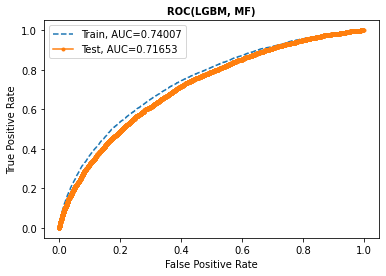

time: 453 ms (started: 2022-05-09 18:30:53 +04:00)


In [38]:
# Best model ROC

train_auc = roc_auc_score (y_train_mf, Y0_lgbm_mf)
test_auc = roc_auc_score(y_test_mf, Y1_lgbm_mf)

tr_fpr, tr_tpr, _ = roc_curve(y_train_mf, Y0_lgbm_mf)
ts_fpr, ts_tpr, _ = roc_curve(y_test_mf, Y1_lgbm_mf)
pyplot.title('ROC(LGBM, MF)', fontsize=10, color='black', weight = 'bold')
pyplot.plot(tr_fpr, tr_tpr, linestyle='--', label='Train, AUC='+str(round(train_auc, 5)))
pyplot.plot(ts_fpr, ts_tpr, marker='.', label='Test, AUC='+str(round(test_auc, 5)))
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
# pyplot.savefig('../figs/roc.png', bbox_inches='tight')
pyplot.show()

 # Feature impact on the target (filled by MissForest, only significant features)

In [39]:
# Scaling data filled missing values by MissForest.

scaler = StandardScaler()

scaled = scaler.fit_transform(x_train_mf_sign)

x_train_mf_sign_minmax = pd.DataFrame(scaled)
x_train_mf_sign_minmax.columns = x_train_mf_sign.columns

print(x_train_mf_sign_minmax)

        NumberOfOpenBankcardTrades  AnnualPercentageRate  TimesTargeted  \
0                        -0.943440              1.845141       0.280298   
1                         0.271223             -0.093257      -0.777897   
2                        -0.943440             -0.871762       1.338493   
3                        -0.538552              0.647895      -0.777897   
4                         0.271223             -1.207935      -0.248799   
...                            ...                   ...            ...   
638929                   -0.133665             -1.192208      -0.777897   
638930                    0.271223              0.062050      -0.248799   
638931                    0.676111             -0.311475      -0.777897   
638932                   -0.538552              0.203597      -0.777897   
638933                   -0.538552              1.286820       1.867590   

         Balance       Age  MonthsOnFile  OfferRate   Payment  \
0       0.729886 -0.573823     -0.

In [40]:
# Replacing significant features with scaled features.

x_train_mf_sign_minmax.columns = x_train_mf_sign.columns

time: 172 µs (started: 2022-05-09 18:30:54 +04:00)


In [41]:
# Running Logistic Regression on scaled data

logreg=LogisticRegression(C=1,penalty='l1',solver="liblinear", random_state=42)

logreg.fit(x_train_mf_sign_minmax,y_train_mf)

est = sm.Logit(y_train_mf, x_train_mf_sign_minmax.astype(float)).fit() 

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.693045
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Lead Flag   No. Observations:               638934
Model:                          Logit   Df Residuals:                   638902
Method:                           MLE   Df Model:                           31
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  -11.81
Time:                        18:31:07   Log-Likelihood:            -4.4281e+05
converged:                       True   LL-Null:                       -34580.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
NumberOfOpenBankcardTrades                    

In [42]:
# Getting important features from Logistic Regression.

importances = pd.DataFrame(data={
    'Attribute': x_train_mf_sign_minmax.columns,
    'Importance': logreg.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

time: 1.38 ms (started: 2022-05-09 18:31:07 +04:00)


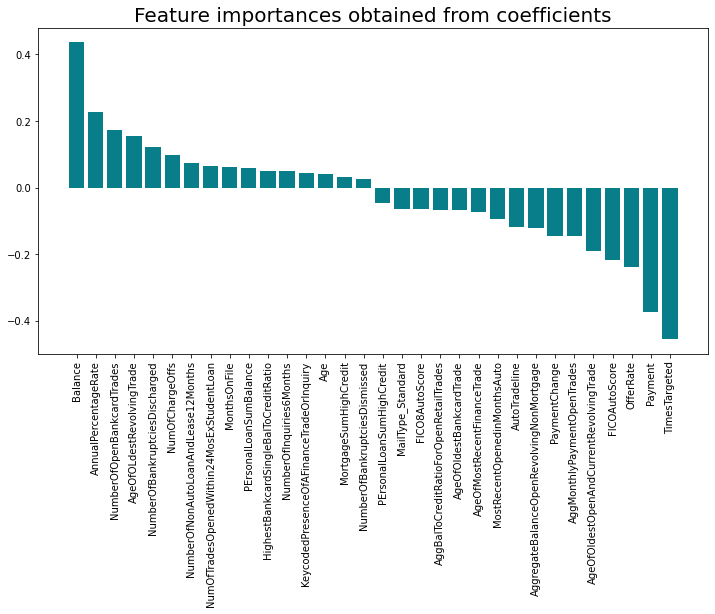

time: 423 ms (started: 2022-05-09 19:44:44 +04:00)


In [44]:
# Feature importance (impact) plot.

fig = pyplot.figure(figsize = (12, 6))
pyplot.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
pyplot.title('Feature importances obtained from coefficients', size=20)
pyplot.xticks(rotation='vertical')
pyplot.savefig('../figs/imp.png', bbox_inches='tight')
pyplot.show()